## Assumptions
### - each game takes 30 turns
### - one player
### - no jail waiting
### - Only considered "Chance" cards that move player:
#### Go directly to jail, Advance to Go, Go back 3 spaces, Advance to nearest utility, Advance to St. Charles Place, Take a walk on the Boardwalk, Take a ride on the Reading Railroad, Advance to Illinois Avenue, Advance token to the nearest railroad
### If a Chance card is pulled, it cannot be pulled again in same "game"
### If landed on a Chance, each of the card above has a 1/16 chance of being pulled
### - Only considered "Community Chest" cards that move player:
#### Advance to Go, Go to jail
### If a Community Chest card is pulled, it cannot be pulled again in same "game"
### If landed on a Community Chest, each of the card above has a 1/16 chance of being pulled




In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Dictionary structure- position(key):[name(val 1), color(val 2)]
#using css colors
#'others' are silver
positions = {
0: ['Go', 'silver'],
1: ['Mediteranian_Avenue', 'saddlebrown'],
2: ['Community_Chest_1', 'silver'],
3: ['Baltic_Avenue', 'saddlebrown'],
4: ['Income_Tax_1', 'silver'],
5: ['Reading_Railroad', 'black'],
6: ['Oriental_Avenue', 'paleturquoise'],
7: ['Chance_1', 'silver'],
8: ['Vermont_Avenue', 'paleturquoise'],
9: ['Connecticut_Avenue', 'paleturquoise'],
10: ['Jail', 'silver'],
11: ['St_Charles_Place', 'hotpink'],
12: ['Electric_Company', 'slategrey'],
13: ['States_Avenue', 'hotpink'],
14: ['Virginia_Avenue', 'hotpink'],
15: ['Pennsylvania_Railroad', 'black'],
16: ['St_James_Place', 'darkorange'],
17: ['Community_Chest_2', 'silver'],
18: ['Tennessee_Avenue', 'darkorange'],
19: ['New_York_Avenue', 'darkorange'],
20: ['Free_Parking', 'silver'],
21: ['Kentucky_Avenue', 'red'],
22: ['Chance_2', 'silver'],
23: ['Indiana_Avenue', 'red'],
24: ['Illinois_Avenue', 'red'],
25: ['B_O_Railroad', 'black'],
26: ['Atlantic_Avenue', 'yellow'],
27: ['Vetnor_Avenue', 'yellow'],
28: ['Water_Works', 'slategray'],
29: ['Marvin_Gardens', 'yellow'],
30: ['Go_To_Jail', 'silver'],
31: ['Pacific_Avenue', 'forestgreen'],
32: ['North_Carolina_Avenue', 'forestgreen'],
33: ['Community_Chest_3', 'silver'],
34: ['Pennsylvania_Avenue', 'forestgreen'],
35: ['Short_Line', 'black'],
36: ['Chance_3', 'silver'],
37: ['Park_Place', 'royalblue'],
38: ['Luxury_Tax', 'silver'],
39: ['Boardwalk', 'royalblue']}

counts = {
0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0,
13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0, 21: 0, 22: 0, 23: 0, 24: 0,
25: 0, 26: 0, 27: 0, 28: 0, 29: 0, 30: 0, 31: 0, 32: 0, 33: 0, 34: 0, 35: 0, 36: 0, 
37: 0, 38: 0, 39: 0}

pos = 0

def dice_throw():
    elements = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12] 
    weights = [1/36, 2/36, 3/36, 4/36, 5/36, 6/36, 5/36, 4/36, 3/36, 2/36, 1/36]
    return np.random.choice(elements, p=weights)

elements = ['Go directly to jail', 'Advance to Go', 'Go back 3 spaces',
                'Advance to nearest utility', 'Advance to St. Charles Place', 
                'Take a walk on the Boardwalk', 'Take a ride on the Reading Railroad',
                'Advance to Illinois Avenue', 'Advance token to the nearest railroad', 'null',
           'null', 'null', 'null', 'null', 'null', 'null']

elements_2 = ['Advance to Go', 'Go to jail', 'null', 'null', 'null', 'null', 'null', 
                            'null', 'null', 'null', 'null', 'null', 'null', 'null', 'null', 'null']
def pull_chance():
    global pos
    global elements
    new_elements = elements
    pull = np.random.choice(new_elements)
    if pull == 'Go directly to jail':
        pos = 10
        new_elements.remove('Go directly to jail')
    elif pull == 'Advance to Go':
        pos = 0
        new_elements.remove('Advance to Go')
    elif pull == 'Go back 3 spaces':
        if pos == 0:
            pos = 37
        elif pos == 1:
            pos = 38
        elif pos == 2:
            pos = 39
        else:
            pos = pos - 3
        new_elements.remove('Go directly to jail')
    elif pull == 'Advance to nearest utility':
        if pos in range(0,13) or pos in range(29, 39):
            pos = 12
        elif pos in range(14,29):
            pos = 28
        new_elements.remove('Advance to nearest utility')
    elif pull == 'Advance to St. Charles Place':
        pos = 11
        new_elements.remove('Advance to St. Charles Place')
    elif pull == 'Take a walk on the Boardwalk':
        pos = 39
        new_elements.remove('Take a walk on the Boardwalk')
    elif pull == 'Take a ride on the Reading Railroad':
        pos = 5
        new_elements.remove('Take a ride on the Reading Railroad')
    elif pull == 'Advance to Illinois Avenue':
        pos = 24
        new_elements.remove('Advance to Illinois Avenue')
    elif pull == 'Advance token to the nearest railroad':
        if pos in range(0,4) or range(35,40):
            pos = 5
        elif pos in range(5,16):
            pos = 15
        elif pos in range(15,26):
            pos = 25
        else:
            pos = 35
        new_elements.remove('Advance token to the nearest railroad')
    else:
        pass 
    
def pull_community():
    global pos
    global elements_2
    new_elements = elements_2
    pull = np.random.choice(new_elements)
    if pull == 'Go to jail':
        pos = 10
        new_elements.remove('Go to jail')
    elif pull == 'Advance to Go':
        pos = 0
        new_elements.remove('Advance to Go')
    else:
        pass

def player_turn():
    move = 0
    global pos
    move = dice_throw()
    pos += move
    if pos > 39:
        pos -= 39
    elif pos == 30:
        pos = 10 #if you land on go to jail, you move to spot 10
    elif pos == 7 or pos == 22 or pos == 36:
        pull_chance()
    elif pos == 2 or pos == 17 or pos == 33:
        pull_community()
    else:
        pass

In [2]:
n = 30
for i in range(n):
    player_turn()
    counts[pos] += 1
    if pos == 7 or pos == 22 or pos == 36:
        pull_chance()
    if pos == 2 or pos == 17 or pos == 33:
        pull_community()

others = counts[0] + counts[2] + counts[4] + counts[7] + counts[10] + \
        counts[17] + counts[20] + counts[22] + counts[30] + counts[33] + counts[36] + counts[38]
railroads = counts[5] + counts[15] + counts[25] + counts[35]
utilities = counts[12] + counts[28]
browns = counts[1] + counts[3]
light_blues = counts[6] + counts[8] + counts[9]
pinks = counts[11] + counts[13] + counts[14]
oranges = counts[16] + counts[18] + counts[19]
reds = counts[21] + counts[23] + counts[24]
yellows = counts[26] + counts[27] + counts[29]
greens = counts[31] + counts[32] + counts[34]
dark_blues = counts[37] + counts[39]

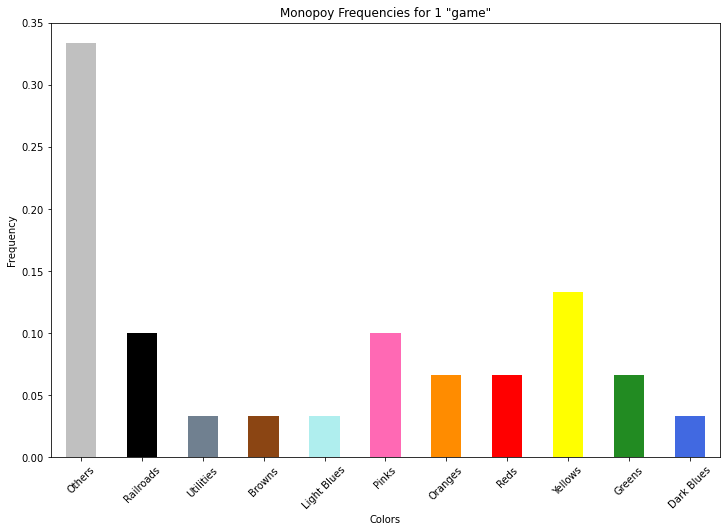

In [3]:
#examining all properties

x_labels = ['Others', 'Railroads', 'Utilities', 'Browns', 'Light Blues', 'Pinks', 'Oranges', 
            'Reds', 'Yellows', 'Greens', 'Dark Blues']
color_counts = [others/n, railroads/n, utilities/n, browns/n, light_blues/n, pinks/n, 
                oranges/n, reds/n, yellows/n, greens/n, dark_blues/n]
x = np.arange(len(x_labels))
color = ['silver', 'black', 'slategray', 'saddlebrown', 'paleturquoise', 'hotpink', 'darkorange', 
         'red', 'yellow', 'forestgreen', 'royalblue']
freq_series = pd.Series(color_counts, index = list(range(len(color_counts))))
plt.figure(figsize=(12, 8))
ax = freq_series.plot(kind='bar', color = color)
ax.set_title('Monopoy Frequencies for 1 \"game\"')
ax.set_xlabel('Colors')
ax.set_ylabel('Frequency')
ax.set_xticklabels(x_labels)
plt.xticks(rotation=45)
plt.show()


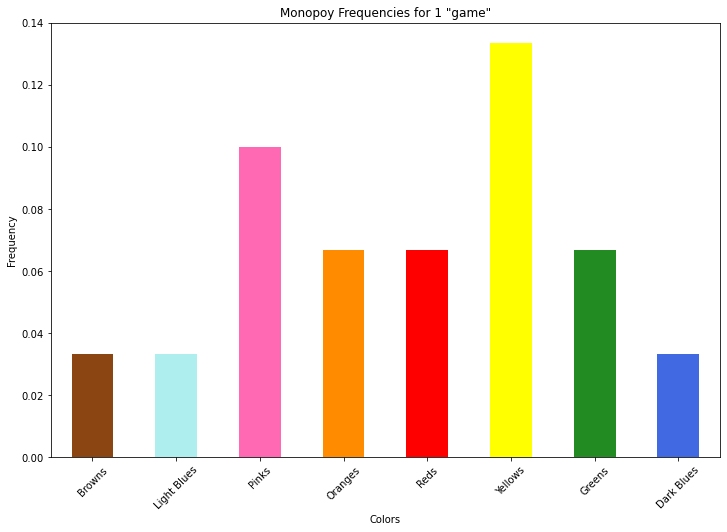

In [4]:
#only examining real-estate type properties
x_labels = ['Browns', 'Light Blues', 'Pinks', 'Oranges', 
            'Reds', 'Yellows', 'Greens', 'Dark Blues']
color_counts = [browns/n, light_blues/n, pinks/n, 
                oranges/n, reds/n, yellows/n, greens/n, dark_blues/n]
x = np.arange(len(x_labels))
color = ['saddlebrown', 'paleturquoise', 'hotpink', 'darkorange', 
         'red', 'yellow', 'forestgreen', 'royalblue']

freq_series = pd.Series(color_counts, index = list(range(len(color_counts))))
plt.figure(figsize=(12, 8))
ax = freq_series.plot(kind='bar', color = color)
ax.set_title('Monopoy Frequencies for 1 \"game\"')
ax.set_xlabel('Colors')
ax.set_ylabel('Frequency')
ax.set_xticklabels(x_labels)
plt.xticks(rotation=45)
plt.show()

In [5]:
#reset counts
counts = {
0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0,
13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0, 21: 0, 22: 0, 23: 0, 24: 0,
25: 0, 26: 0, 27: 0, 28: 0, 29: 0, 30: 0, 31: 0, 32: 0, 33: 0, 34: 0, 35: 0, 36: 0, 
37: 0, 38: 0, 39: 0}

m = 10000
n = 30
for j in range(m):
    pos = 0 #reset position back to 0
    for i in range(n):
        elements = ['Go directly to jail', 'Advance to Go', 'Go back 3 spaces',
                'Advance to nearest utility', 'Advance to St. Charles Place', 
                'Take a walk on the Boardwalk', 'Take a ride on the Reading Railroad',
                'Advance to Illinois Avenue', 'Advance token to the nearest railroad', 'null',
           'null', 'null', 'null', 'null', 'null', 'null']

        elements_2 = ['Advance to Go', 'Go to jail', 'null', 'null', 'null', 'null', 'null', 
                            'null', 'null', 'null', 'null', 'null', 'null', 'null', 'null', 'null']

        def pull_chance():
            global pos
            global elements
            new_elements = elements
            pull = np.random.choice(new_elements)
            if pull == 'Go directly to jail':
                pos = 10
                new_elements.remove('Go directly to jail')
            elif pull == 'Advance to Go':
                pos = 0
                new_elements.remove('Advance to Go')
            elif pull == 'Go back 3 spaces':
                if pos == 0:
                    pos = 37
                elif pos == 1:
                    pos = 38
                elif pos == 2:
                    pos = 39
                else:
                    pos = pos - 3
                new_elements.remove('Go back 3 spaces')
            elif pull == 'Advance to nearest utility':
                if pos in range(0,13) or pos in range(29, 39):
                    pos = 12
                elif pos in range(14,29):
                    pos = 28
                new_elements.remove('Advance to nearest utility')
            elif pull == 'Advance to St. Charles Place':
                pos = 11
                new_elements.remove('Advance to St. Charles Place')
            elif pull == 'Take a walk on the Boardwalk':
                pos = 39
                new_elements.remove('Take a walk on the Boardwalk')
            elif pull == 'Take a ride on the Reading Railroad':
                pos = 5
                new_elements.remove('Take a ride on the Reading Railroad')
            elif pull == 'Advance to Illinois Avenue':
                pos = 24
                new_elements.remove('Advance to Illinois Avenue')
            elif pull == 'Advance token to the nearest railroad':
                if pos in range(0,4) or range(35,40):
                    pos = 5
                elif pos in range(5,16):
                    pos = 15
                elif pos in range(15,26):
                    pos = 25
                else:
                    pos = 35
                new_elements.remove('Advance token to the nearest railroad')
            else:
                pass 

        def pull_community():
            global pos
            global elements_2
            new_elements = elements_2
            pull = np.random.choice(new_elements)
            if pull == 'Go to jail':
                pos = 10
                new_elements.remove('Go to jail')
            elif pull == 'Advance to Go':
                pos = 0
                new_elements.remove('Advance to Go')
            else:
                pass
                player_turn()
                counts[pos] += 1
                if pos == 7 or pos == 22 or pos == 36:
                    pull_chance()
                if pos == 2 or pos == 17 or pos == 33:
                    pull_community()
        player_turn()
        counts[pos] += 1
        if pos == 7 or pos == 22 or pos == 36:
            pull_chance()
        if pos == 2 or pos == 17 or pos == 33:
            pull_community()

others = counts[0] + counts[2] + counts[4] + counts[7] + counts[10] + \
        counts[17] + counts[20] + counts[22] + counts[30] + counts[33] + counts[36] + counts[38]
railroads = counts[5] + counts[15] + counts[25] + counts[35]
utilities = counts[12] + counts[28]
browns = counts[1] + counts[3]
light_blues = counts[6] + counts[8] + counts[9]
pinks = counts[11] + counts[13] + counts[14]
oranges = counts[16] + counts[18] + counts[19]
reds = counts[21] + counts[23] + counts[24]
yellows = counts[26] + counts[27] + counts[29]
greens = counts[31] + counts[32] + counts[34]
dark_blues = counts[37] + counts[39]

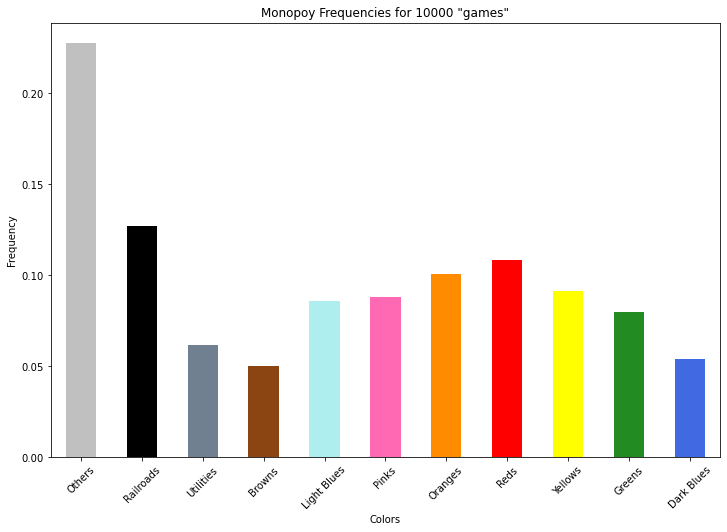

In [6]:
x_labels = ['Others', 'Railroads', 'Utilities', 'Browns', 'Light Blues', 'Pinks', 'Oranges', 
            'Reds', 'Yellows', 'Greens', 'Dark Blues']
color_counts = [others/(n*m), railroads/(n*m), utilities/(n*m), browns/(n*m), light_blues/(n*m), pinks/(n*m), 
                oranges/(n*m), reds/(n*m), yellows/(n*m), greens/(n*m), dark_blues/(n*m)]
x = np.arange(len(x_labels))
color = ['silver', 'black', 'slategray', 'saddlebrown', 'paleturquoise', 'hotpink', 'darkorange', 
         'red', 'yellow', 'forestgreen', 'royalblue']

freq_series = pd.Series(color_counts, index = list(range(len(color_counts))))
plt.figure(figsize=(12, 8))
ax = freq_series.plot(kind='bar', color = color)
ax.set_title('Monopoy Frequencies for 10000 \"games\"')
ax.set_xlabel('Colors')
ax.set_ylabel('Frequency')
ax.set_xticklabels(x_labels)
plt.xticks(rotation=45)
plt.show()


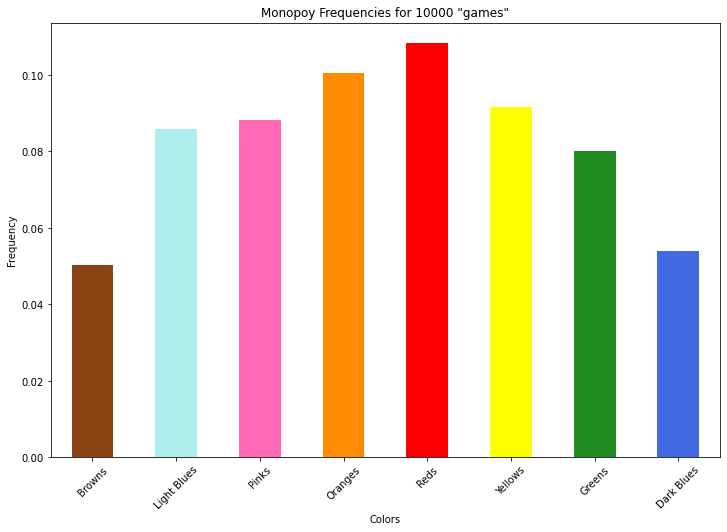

In [7]:
x_labels = ['Browns', 'Light Blues', 'Pinks', 'Oranges', 
            'Reds', 'Yellows', 'Greens', 'Dark Blues']
color_counts = [browns/(n*m), light_blues/(n*m), pinks/(n*m), 
                oranges/(n*m), reds/(n*m), yellows/(n*m), greens/(n*m), dark_blues/(n*m)]
x = np.arange(len(x_labels))
color = ['saddlebrown', 'paleturquoise', 'hotpink', 'darkorange', 
         'red', 'yellow', 'forestgreen', 'royalblue']

freq_series = pd.Series(color_counts, index = list(range(len(color_counts))))
plt.figure(figsize=(12, 8))
ax = freq_series.plot(kind='bar', color = color)
ax.set_title('Monopoy Frequencies for 10000 \"games\"')
ax.set_xlabel('Colors')
ax.set_ylabel('Frequency')
ax.set_xticklabels(x_labels)
plt.xticks(rotation=45)
plt.show()